# 📊 Fiziksel Tıp & Rehabilitasyon Veri Analizi

**Ad Soyad:** Erdem Baran
**E-posta:** erdembaran908@gmail.com

Bu notebook’ta:  
1. Gerekli kütüphanelerin kurulumu  
2. Keşifsel Veri Analizi (EDA)  
3. Veri Ön İşleme (temizleme, dönüştürme)  
4. Modellemeye hazır veri seti oluşturma

In [2]:
# Gerekli kütüphaneleri yükleyelim
!pip install --upgrade pip setuptools wheel

!pip install numpy==2.3.2 pandas==2.3.2 matplotlib==3.8.0 seaborn==0.12.2 scikit-learn==1.3.2

# Kütüphaneleri import et
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Jupyter için ayarlar
pd.set_option("display.max_columns", None)
sns.set_theme(style="whitegrid")

print("Numpy sürümü:", np.__version__)
print("Pandas sürümü:", pd.__version__)

ERROR: Ignored the following versions that require a different python version: 2.3.0 Requires-Python >=3.11; 2.3.1 Requires-Python >=3.11; 2.3.2 Requires-Python >=3.11
ERROR: Could not find a version that satisfies the requirement numpy==2.3.2 (from versions: 1.3.0, 1.4.1, 1.5.0, 1.5.1, 1.6.0, 1.6.1, 1.6.2, 1.7.0, 1.7.1, 1.7.2, 1.8.0, 1.8.1, 1.8.2, 1.9.0, 1.9.1, 1.9.2, 1.9.3, 1.10.0.post2, 1.10.1, 1.10.2, 1.10.4, 1.11.0, 1.11.1, 1.11.2, 1.11.3, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 1.13.3, 1.14.0, 1.14.1, 1.14.2, 1.14.3, 1.14.4, 1.14.5, 1.14.6, 1.15.0, 1.15.1, 1.15.2, 1.15.3, 1.15.4, 1.16.0, 1.16.1, 1.16.2, 1.16.3, 1.16.4, 1.16.5, 1.16.6, 1.17.0, 1.17.1, 1.17.2, 1.17.3, 1.17.4, 1.17.5, 1.18.0, 1.18.1, 1.18.2, 1.18.3, 1.18.4, 1.18.5, 1.19.0, 1.19.1, 1.19.2, 1.19.3, 1.19.4, 1.19.5, 1.20.0, 1.20.1, 1.20.2, 1.20.3, 1.21.0, 1.21.1, 1.21.2, 1.21.3, 1.21.4, 1.21.5, 1.21.6, 1.22.0, 1.22.1, 1.22.2, 1.22.3, 1.22.4, 1.23.0, 1.23.1, 1.23.2, 1.23.3, 1.23.4, 1.23.5, 1.24.0, 1.24.1, 1.24.2, 1.24.3, 1.24.4,

Numpy sürümü: 2.2.6
Pandas sürümü: 2.3.2


## 2. Veri Setini Yükleyelim

In [3]:
df = pd.read_excel("Talent_Academy_Case_DT_2025.xlsx")
df.head()

,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi
0,145134,60,Kadın,0 Rh+,Türkiye,"Becker Musküler Distrofisi, Hiportiroidizm, Ka...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",TOZ,Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,5 Seans,Ayak Bileği,20 Dakika
1,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,20 Dakika
2,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika
3,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,5 Dakika
4,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika


## 3. Veri Hakkında Genel Bilgi

Veri Boyutu: (2235, 13)

--- INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   HastaNo          2235 non-null   int64 
 1   Yas              2235 non-null   int64 
 2   Cinsiyet         2066 non-null   object
 3   KanGrubu         1560 non-null   object
 4   Uyruk            2235 non-null   object
 5   KronikHastalik   1624 non-null   object
 6   Bolum            2224 non-null   object
 7   Alerji           1291 non-null   object
 8   Tanilar          2160 non-null   object
 9   TedaviAdi        2235 non-null   object
 10  TedaviSuresi     2235 non-null   object
 11  UygulamaYerleri  2014 non-null   object
 12  UygulamaSuresi   2235 non-null   object
dtypes: int64(2), object(11)
memory usage: 227.1+ KB

--- İSTATİSTİKSEL ÖZET ---


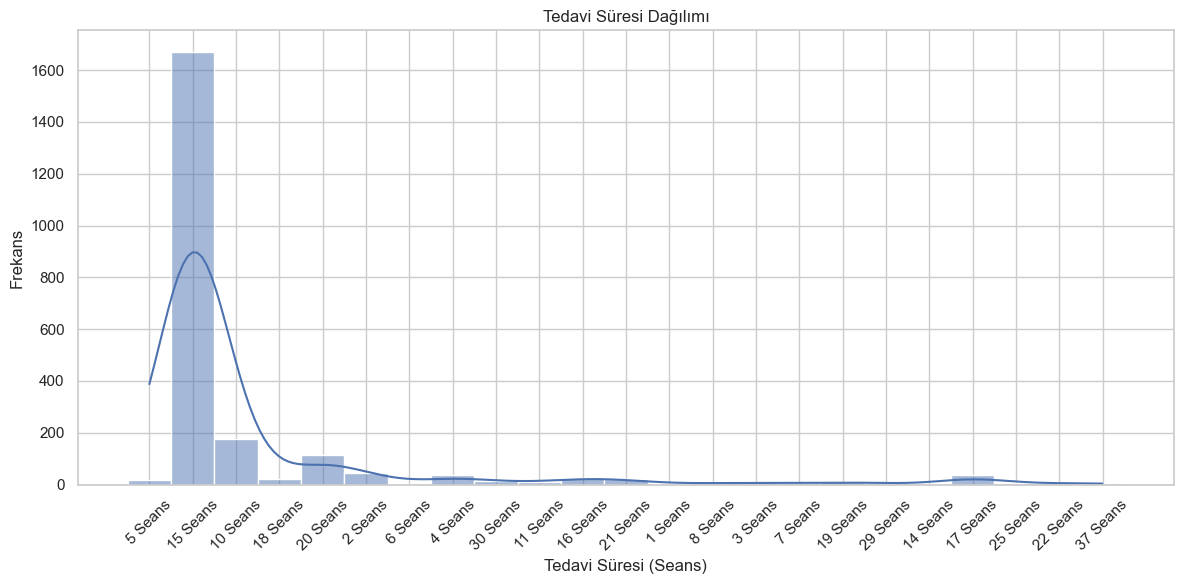

In [4]:
print("Veri Boyutu:", df.shape)
print("\n--- INFO ---")
df.info()
print("\n--- İSTATİSTİKSEL ÖZET ---")
df.describe(include='all')

plt.figure(figsize=(12,6))
sns.histplot(df["TedaviSuresi"], bins=30, kde=True)
plt.title("Tedavi Süresi Dağılımı")
plt.xlabel("Tedavi Süresi (Seans)")
plt.ylabel("Frekans")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4. Eksik Veri Analizi


--- EKSİK DEĞERLER ---


,Eksik Değer,Yüzde
Alerji,944,42.237136
KanGrubu,675,30.201342
KronikHastalik,611,27.337808
UygulamaYerleri,221,9.888143
Cinsiyet,169,7.561521
Tanilar,75,3.355705
Bolum,11,0.492170
HastaNo,0,0.000000
Yas,0,0.000000
Uyruk,0,0.000000


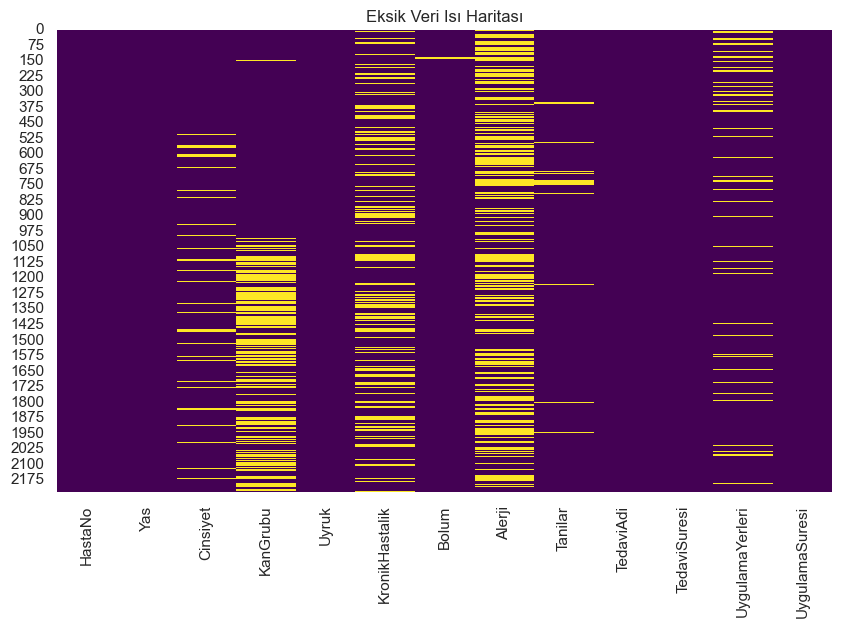

In [19]:
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({"Eksik Değer": missing, "Yüzde": missing_percent})
print("\n--- EKSİK DEĞERLER ---")
display(missing_df.sort_values(by="Eksik Değer", ascending=False))

plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False, cmap="viridis")
plt.title("Eksik Veri Isı Haritası")
plt.show()

## 5. Değişken Türlerini Ayırma

In [6]:
categorical_cols = df.select_dtypes(include="object").columns.tolist()
numerical_cols = df.select_dtypes(include=["int64","float64"]).columns.tolist()

if "TedaviSuresi" in numerical_cols:
    numerical_cols.remove("TedaviSuresi")

print("Kategorik Değişkenler:", categorical_cols)
print("Sayısal Değişkenler:", numerical_cols)

Kategorik Değişkenler: ['Cinsiyet', 'KanGrubu', 'Uyruk', 'KronikHastalik', 'Bolum', 'Alerji', 'Tanilar', 'TedaviAdi', 'TedaviSuresi', 'UygulamaYerleri', 'UygulamaSuresi']
Sayısal Değişkenler: ['HastaNo', 'Yas']


## 6. Veri Ön İşleme Pipeline

In [17]:
# UygulamaSuresi sütununu sayıya çevir
df["UygulamaSuresi"] = df["UygulamaSuresi"].str.extract("(\d+)").astype(float)

# Sayısal ve kategorik sütunlar
numeric_features = ["Yas", "UygulamaSuresi"]
categorical_features = [col for col in df.columns if col not in numeric_features + ["TedaviSuresi"]]

# Ön işleme adımları
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])

# Özellik ve hedef
X = df.drop("TedaviSuresi", axis=1)
y = df["TedaviSuresi"]

# Ön işleme uygula
X_ready = preprocessor.fit_transform(X)

print("Dönüştürülmüş X boyutu:", X_ready.shape)
print("Hedef değişken boyutu:", y.shape)


Dönüştürülmüş X boyutu: (2235, 1337)
Hedef değişken boyutu: (2235,)


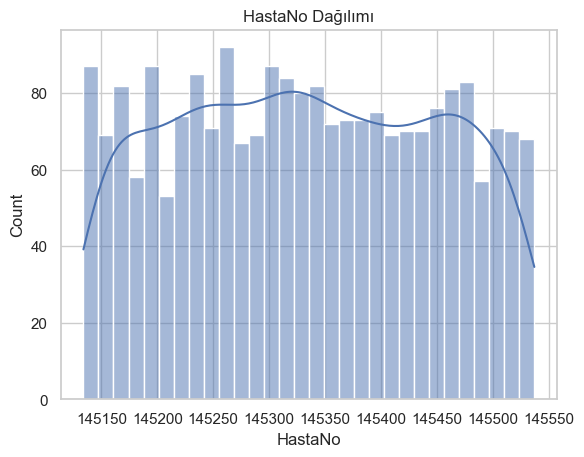

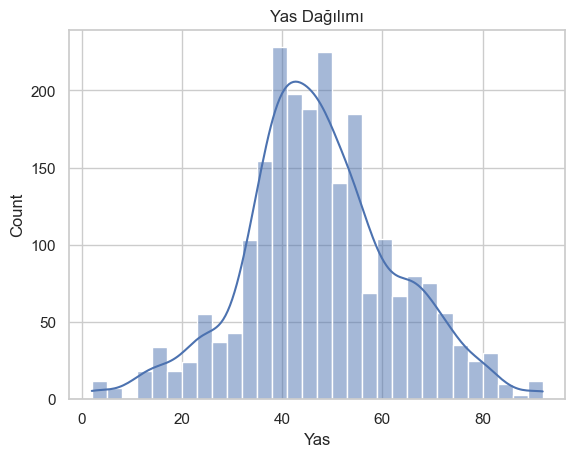

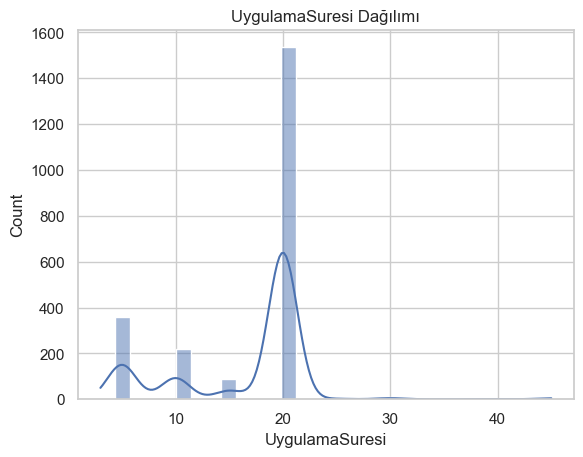

In [20]:
numeric_features = df.select_dtypes(include=['int64','float64']).columns
for col in numeric_features:
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"{col} Dağılımı")
    plt.show()

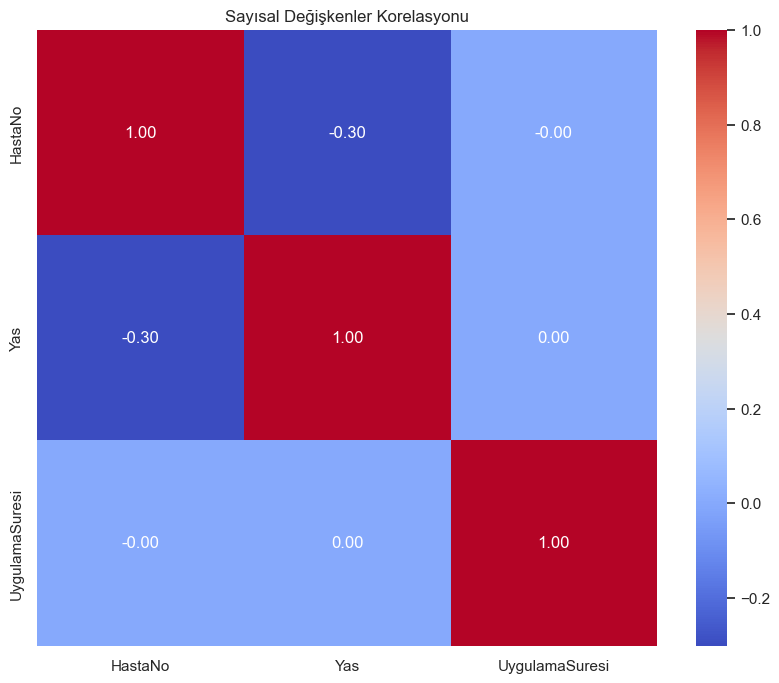

In [24]:
plt.figure(figsize=(10,8))
corr = df[numeric_features].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Sayısal Değişkenler Korelasyonu")
plt.show()

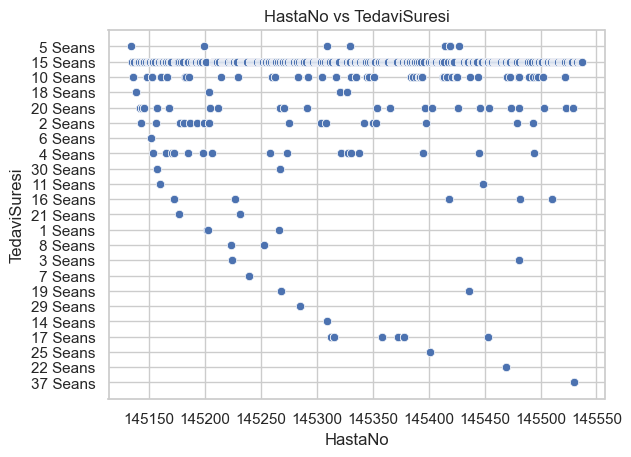

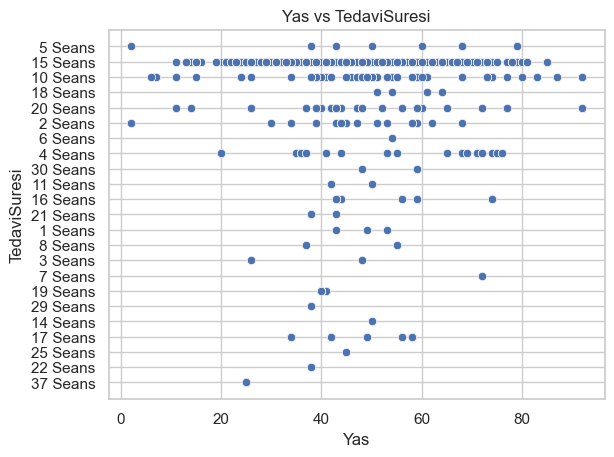

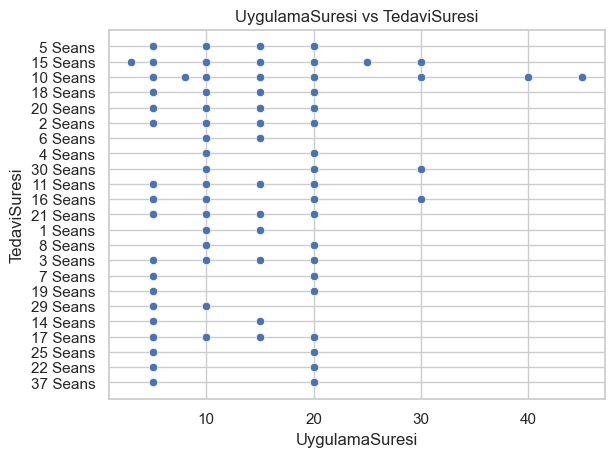

In [27]:
for col in numeric_features:
    if col != "TedaviSuresi":
        sns.scatterplot(x=df[col], y=df["TedaviSuresi"])
        plt.title(f"{col} vs TedaviSuresi")
        plt.show()


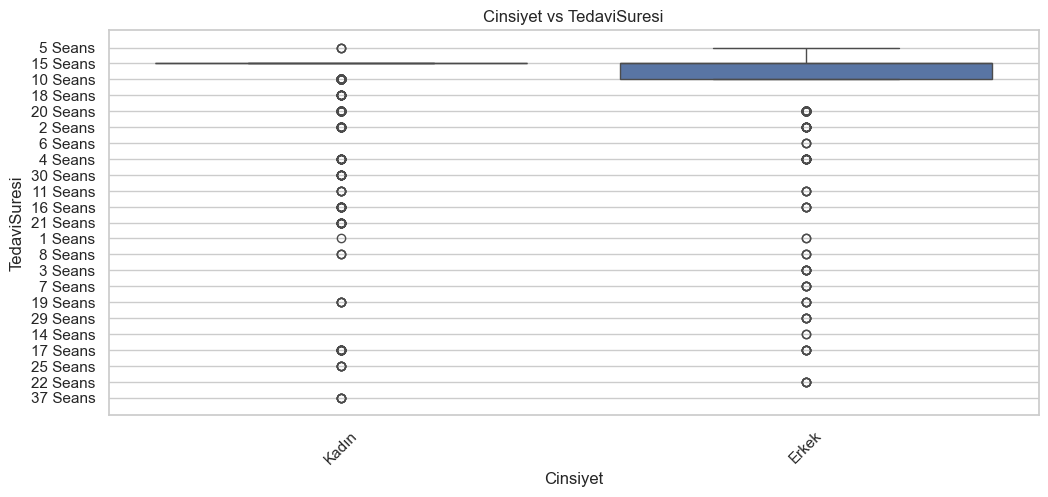

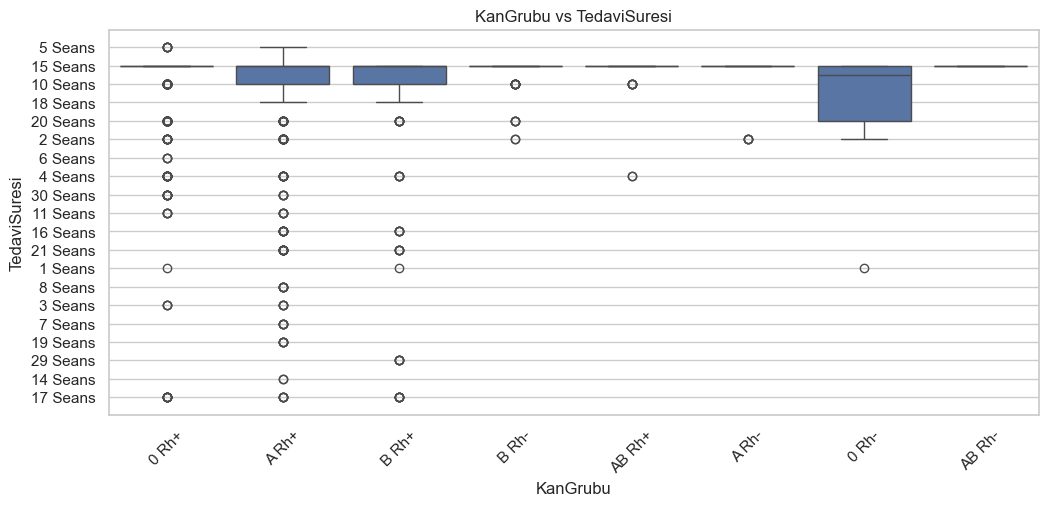

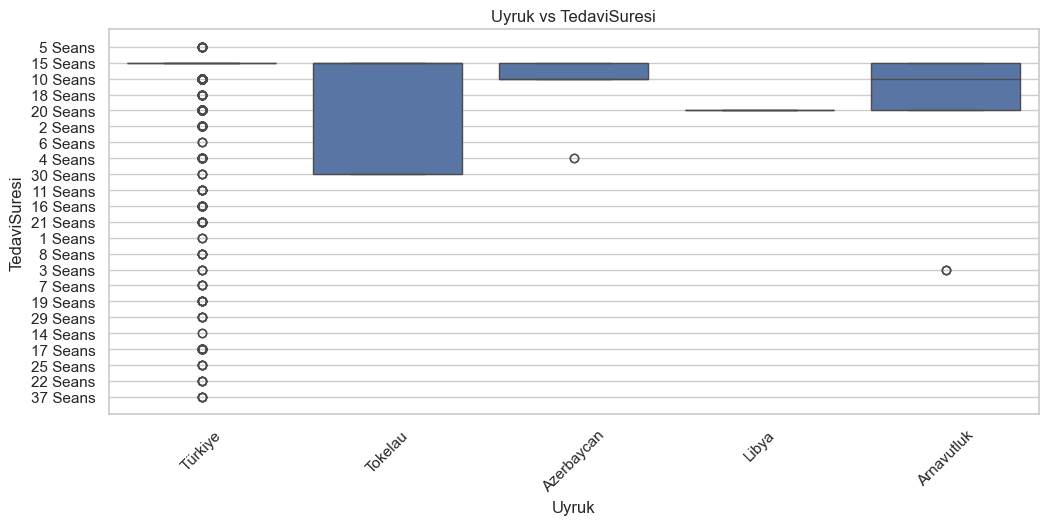

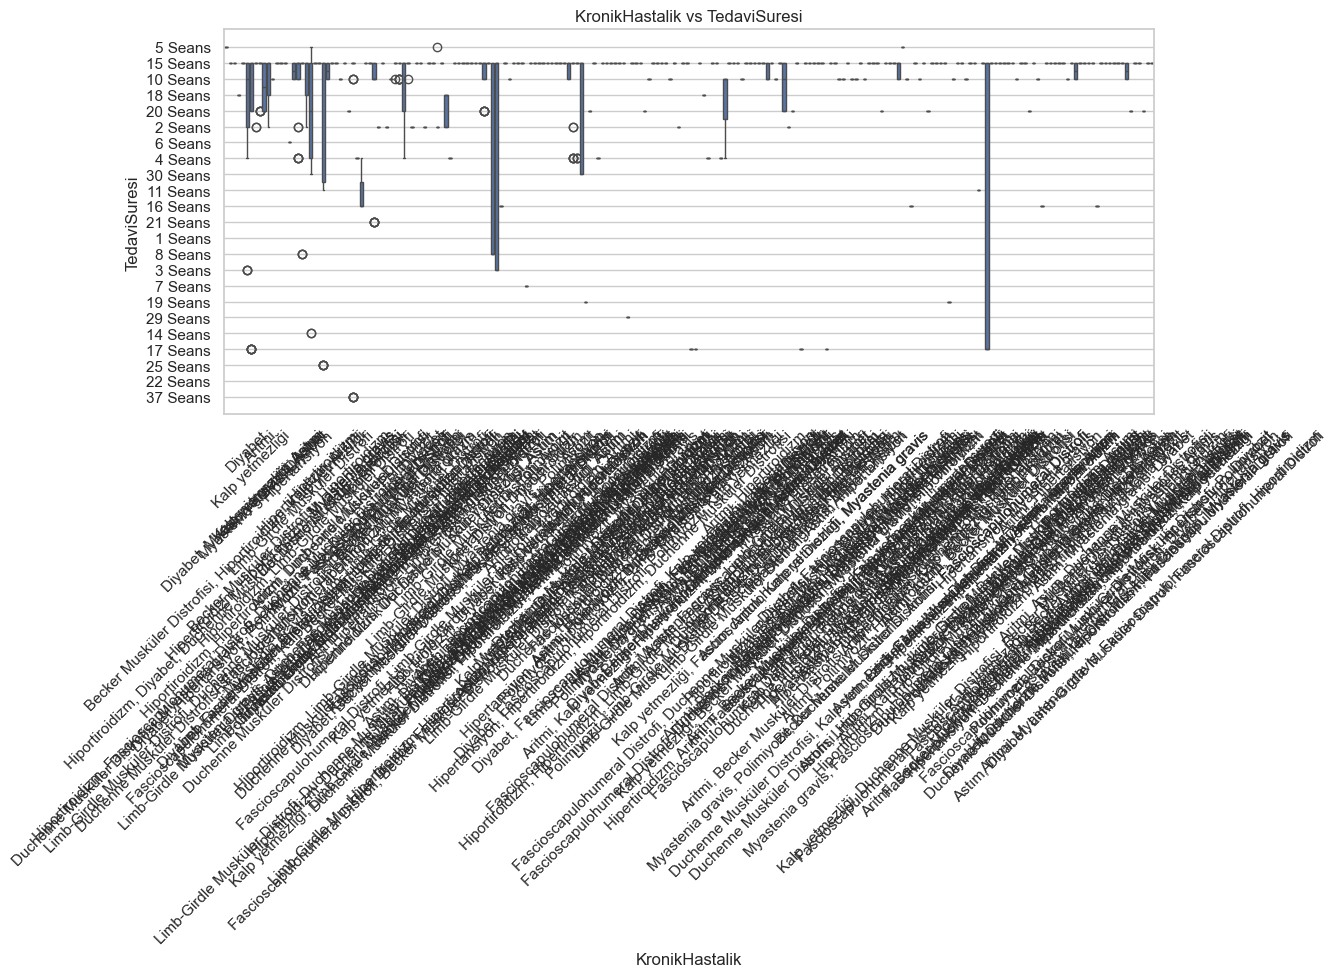

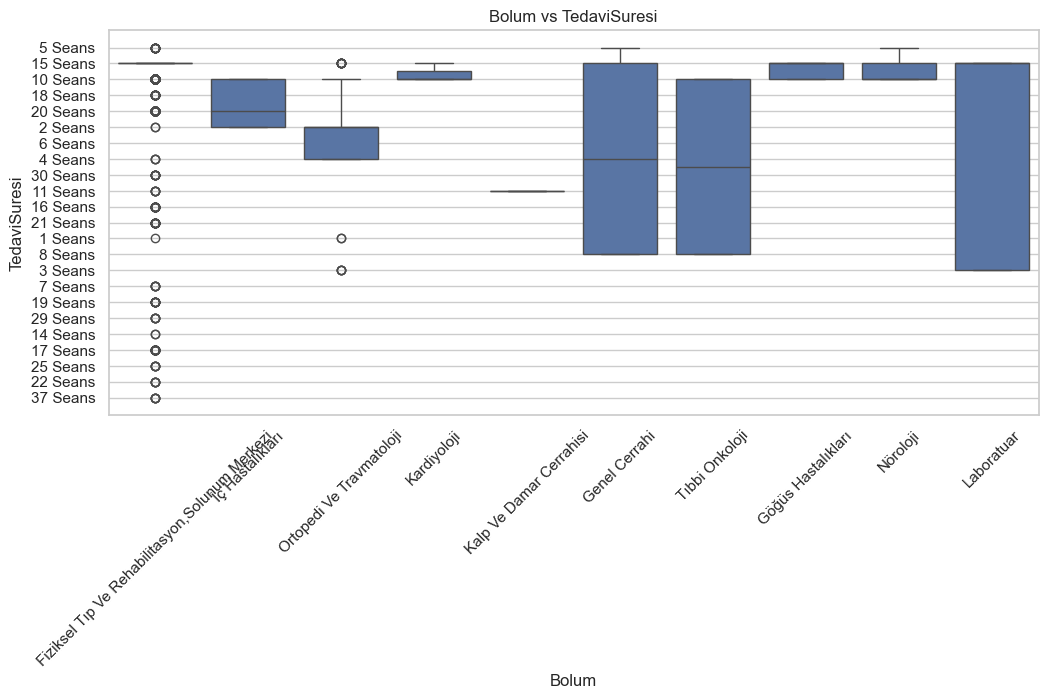

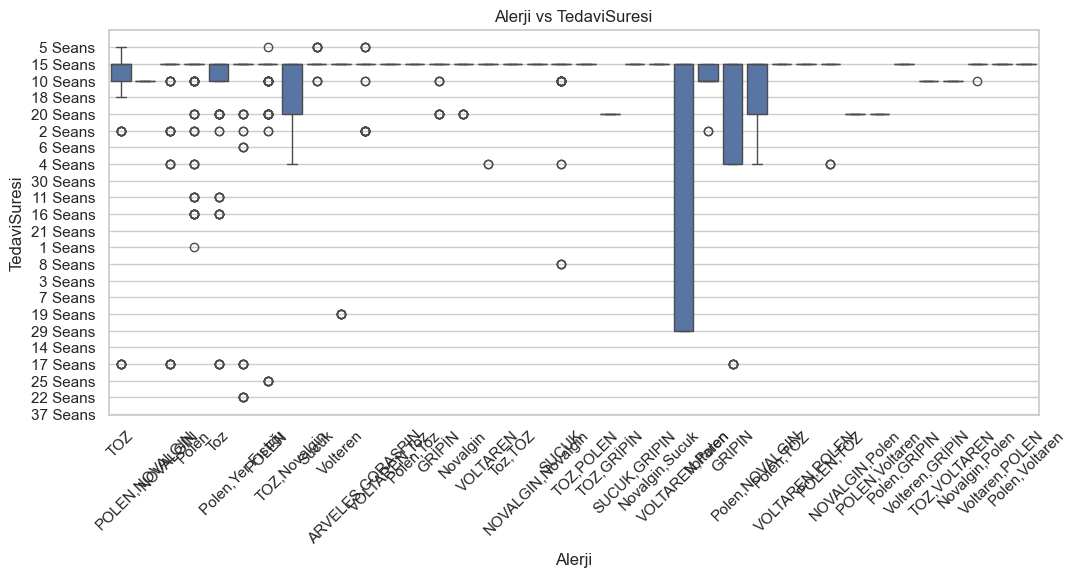

C:\Users\Erdem\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65279 (\N{ZERO WIDTH NO-BREAK SPACE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


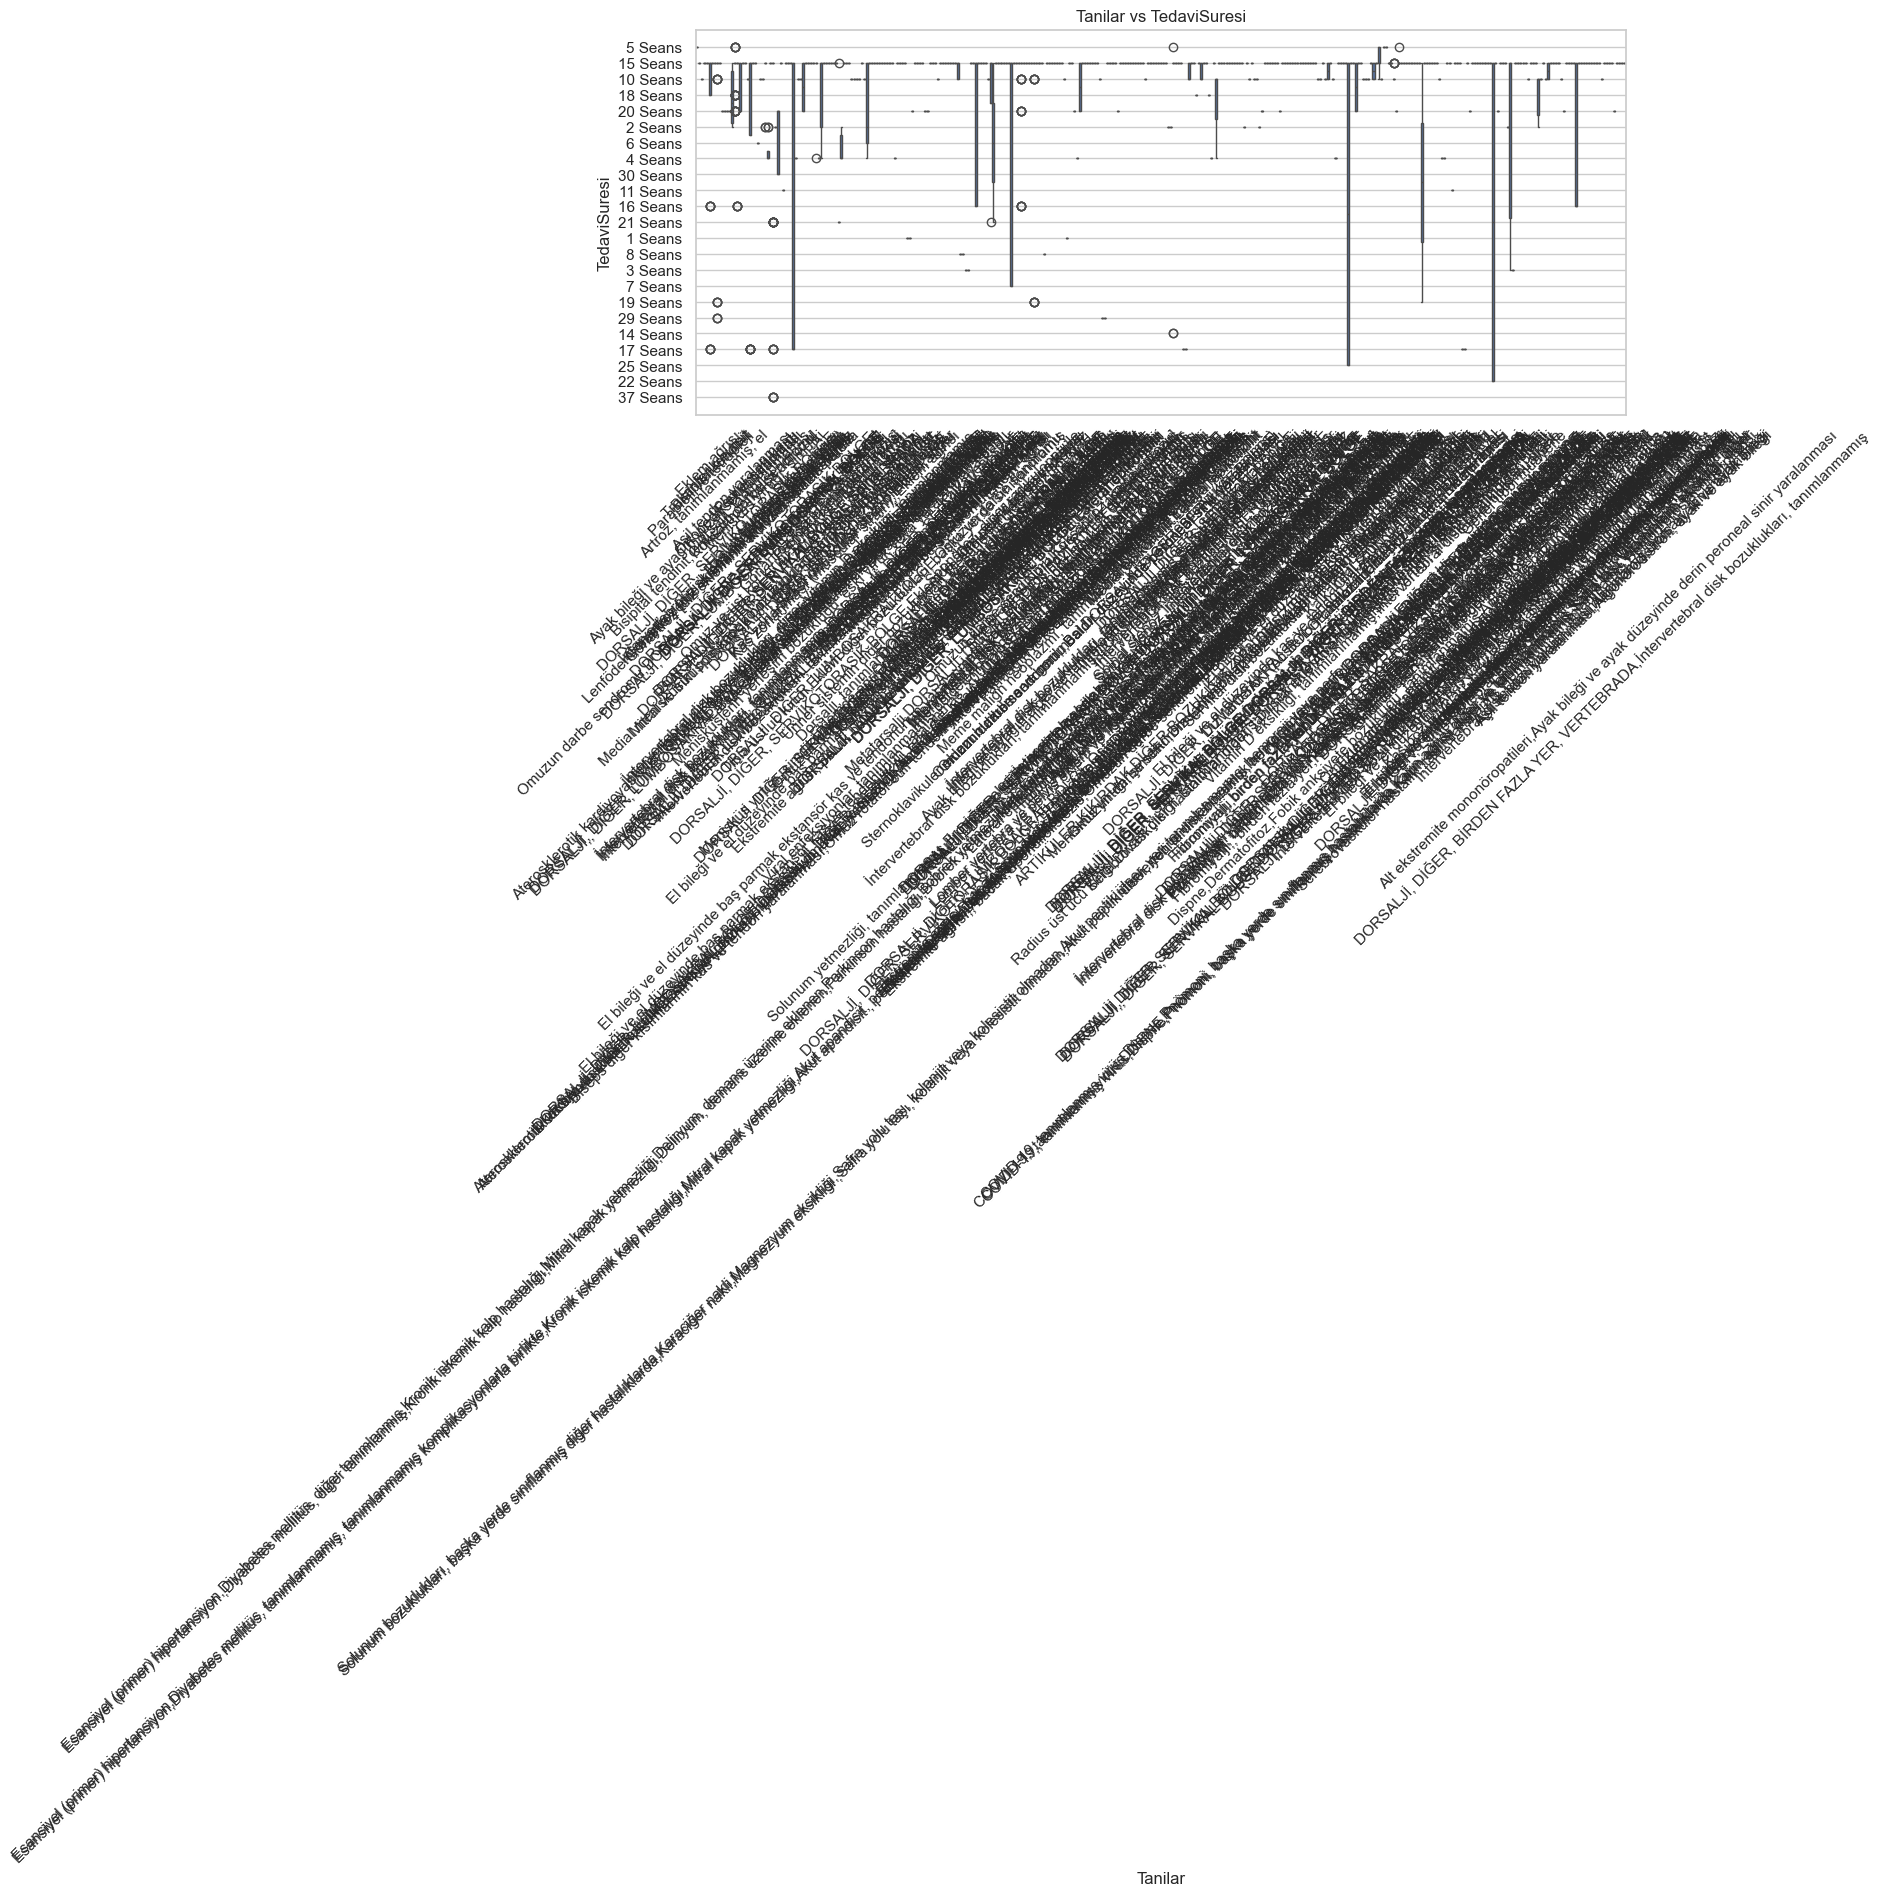

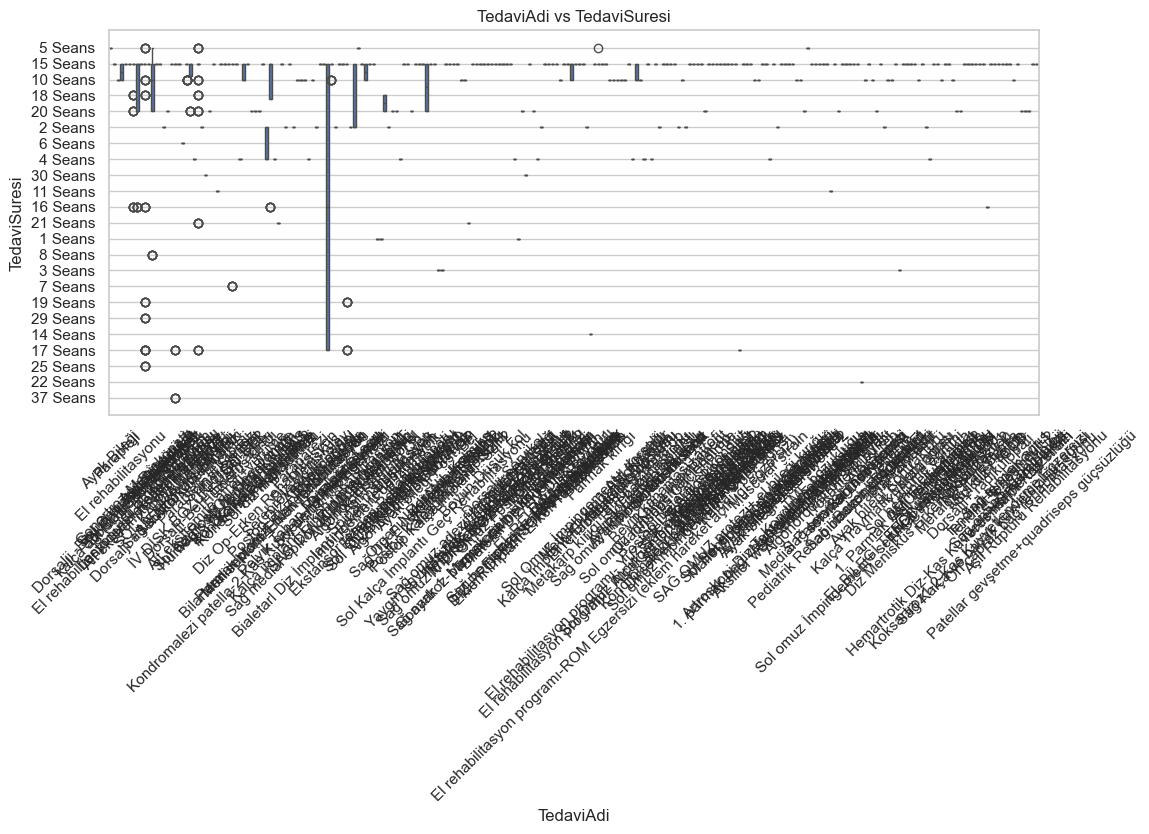

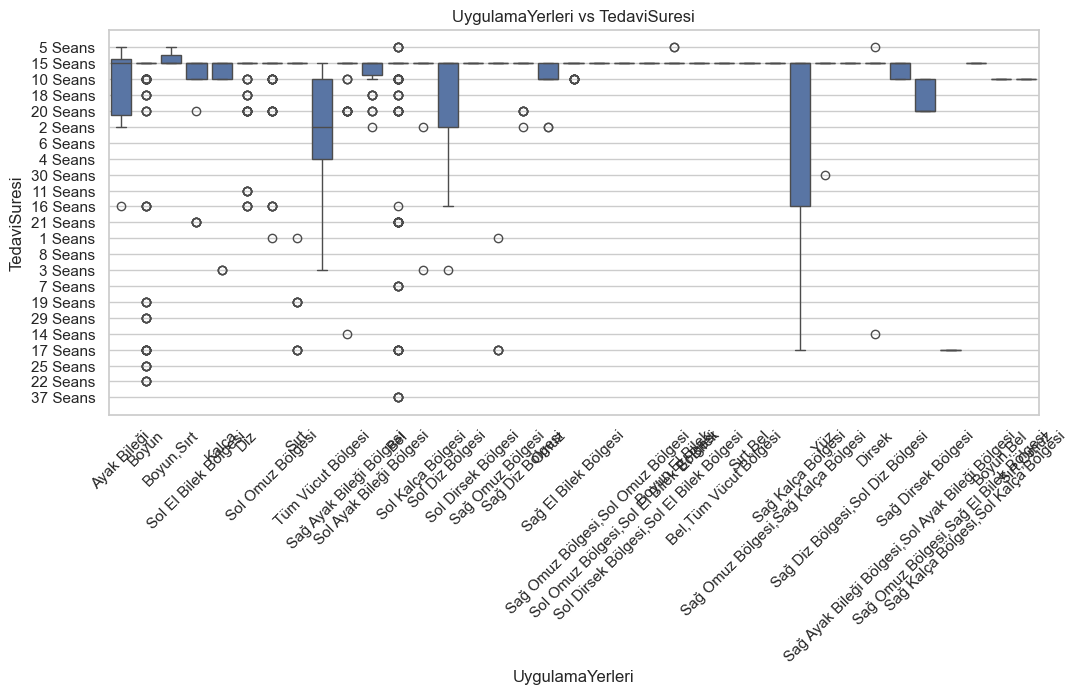

In [28]:
for col in categorical_features:
    if col != "TedaviSuresi":
        plt.figure(figsize=(12,5))
        sns.boxplot(x=df[col], y=df["TedaviSuresi"])
        plt.xticks(rotation=45)
        plt.title(f"{col} vs TedaviSuresi")
        plt.show()